### Import the necessary libraries

In [1]:
import glob
import pandas as pd

### Get the data

In [2]:
path =r'data/luftdaten/7789' 
bf_7789 = pd.concat([pd.read_csv(f, sep=';') for f in glob.glob(path + "/*.csv")],
                      ignore_index=True)

### Start to explore the data

In [3]:
bf_7789.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84808 entries, 0 to 84807
Data columns (total 12 columns):
sensor_id      84808 non-null int64
sensor_type    84808 non-null object
location       84808 non-null int64
lat            84808 non-null float64
lon            84808 non-null float64
timestamp      84808 non-null object
P1             84808 non-null float64
durP1          0 non-null float64
ratioP1        0 non-null float64
P2             84808 non-null float64
durP2          0 non-null float64
ratioP2        0 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 7.8+ MB


### Look at the first rows

In [96]:
bf_7789.head()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
84803,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:48:53,15.30,NaN,NaN,2.67,NaN,NaN
84804,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:51:20,17.27,NaN,NaN,2.97,NaN,NaN
84805,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:53:47,17.57,NaN,NaN,2.67,NaN,NaN
84806,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:56:14,13.60,NaN,NaN,2.83,NaN,NaN
84807,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:58:41,24.97,NaN,NaN,2.87,NaN,NaN


### Look at the last rows

In [97]:
bf_7789.tail()

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
84803,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:48:53,15.30,NaN,NaN,2.67,NaN,NaN
84804,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:51:20,17.27,NaN,NaN,2.97,NaN,NaN
84805,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:53:47,17.57,NaN,NaN,2.67,NaN,NaN
84806,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:56:14,13.60,NaN,NaN,2.83,NaN,NaN
84807,7789,SDS011,3939,57.13,-2.087,2018-02-16T23:58:41,24.97,NaN,NaN,2.87,NaN,NaN


### What is the structure like? 

In [5]:
# this provides a rough equivalent of the R str() function:

def rstr(df): return df.shape, df.apply(lambda x: [x.unique()])

print(rstr(bf_7789))

((84808, 12), sensor_id                                               [[7789]]
sensor_type                                           [[SDS011]]
location                                                [[3939]]
lat                                                    [[57.13]]
lon                                      [[-2.0869999999999997]]
timestamp      [[2018-05-07T00:01:23, 2018-05-07T00:03:50, 20...
P1             [[3.17, 2.9, 3.37, 5.37, 5.03, 4.9, 3.0, 5.53,...
durP1                                                    [[nan]]
ratioP1                                                  [[nan]]
P2             [[2.6, 2.57, 2.5, 2.77, 2.67, 2.3, 2.53, 2.93,...
durP2                                                    [[nan]]
ratioP2                                                  [[nan]]
dtype: object)


## Drop columns with no values

In [6]:
bf_7789_nona = bf_7789.dropna(axis=1, how='all')

In [7]:
print(rstr(bf_7789_nona))

((84808, 8), sensor_id                                               [[7789]]
sensor_type                                           [[SDS011]]
location                                                [[3939]]
lat                                                    [[57.13]]
lon                                      [[-2.0869999999999997]]
timestamp      [[2018-05-07T00:01:23, 2018-05-07T00:03:50, 20...
P1             [[3.17, 2.9, 3.37, 5.37, 5.03, 4.9, 3.0, 5.53,...
P2             [[2.6, 2.57, 2.5, 2.77, 2.67, 2.3, 2.53, 2.93,...
dtype: object)


In [8]:
bf_7789_nona_trim = bf_7789_nona.drop(['sensor_id','location','sensor_type','lat','lon'],axis=1)

In [9]:
print(rstr(bf_7789_nona_trim))

((84808, 3), timestamp    [[2018-05-07T00:01:23, 2018-05-07T00:03:50, 20...
P1           [[3.17, 2.9, 3.37, 5.37, 5.03, 4.9, 3.0, 5.53,...
P2           [[2.6, 2.57, 2.5, 2.77, 2.67, 2.3, 2.53, 2.93,...
dtype: object)


In [10]:
max_7789_p1 = bf_7789_nona_trim[bf_7789_nona_trim['P1']==bf_7789_nona_trim['P1'].max()]
min_7789_p1 = bf_7789_nona_trim[bf_7789_nona_trim['P1']==bf_7789_nona_trim['P1'].min()]

max_7789_p2 = bf_7789_nona_trim[bf_7789_nona_trim['P2']==bf_7789_nona_trim['P2'].max()]
min_7789_p2 = bf_7789_nona_trim[bf_7789_nona_trim['P2']==bf_7789_nona_trim['P2'].min()]

In [11]:
print ("Max P1")
print (max_7789_p1)

print ("\nMin P1")
print (min_7789_p1)

print ("\nMax P2")
print (max_7789_p2)

print ("\nMin P2")
print (min_7789_p2)

Max P1
                 timestamp      P1     P2
57134  2018-05-13T06:37:45  620.03  56.43

Min P1
                 timestamp   P1   P2
7454   2018-01-28T23:37:38  0.0  0.0
20461  2018-03-23T15:20:45  0.0  0.0
20467  2018-03-23T15:35:25  0.0  0.0
20469  2018-03-23T15:40:20  0.0  0.0
20492  2018-03-23T16:36:40  0.0  0.0
20802  2017-12-25T05:59:39  0.0  0.0
30005  2017-12-24T02:07:26  0.0  0.0
30007  2017-12-24T02:14:52  0.0  0.0
37430  2017-12-23T01:20:28  0.0  0.0
37443  2017-12-23T01:57:37  0.0  0.0
37445  2017-12-23T02:02:31  0.0  0.0
37449  2017-12-23T02:12:18  0.0  0.0
37450  2017-12-23T02:14:44  0.0  0.0
37451  2017-12-23T02:17:11  0.0  0.0
37453  2017-12-23T02:22:05  0.0  0.0
37455  2017-12-23T02:26:58  0.0  0.0
37456  2017-12-23T02:32:11  0.0  0.0
37457  2017-12-23T02:37:26  0.0  0.0
37458  2017-12-23T02:39:53  0.0  0.0
37460  2017-12-23T02:44:47  0.0  0.0
37461  2017-12-23T02:47:14  0.0  0.0
37463  2017-12-23T02:52:07  0.0  0.0
37465  2017-12-23T02:57:01  0.0  0.0
37466  2017-1

In [16]:
filtered_7789 = bf_7789_nona_trim[(bf_7789_nona_trim['P1'] > 0) & (bf_7789_nona_trim['P2'] >0)]


In [17]:
print(rstr(filtered_7789))

((84726, 3), timestamp    [[2018-05-07T00:01:23, 2018-05-07T00:03:50, 20...
P1           [[3.17, 2.9, 3.37, 5.37, 5.03, 4.9, 3.0, 5.53,...
P2           [[2.6, 2.57, 2.5, 2.77, 2.67, 2.3, 2.53, 2.93,...
dtype: object)


In [18]:
max_7789_p1 = filtered_7789[filtered_7789['P1']==filtered_7789['P1'].max()]
min_7789_p1 = filtered_7789[filtered_7789['P1']==filtered_7789['P1'].min()]

max_7789_p2 = filtered_7789[filtered_7789['P2']==filtered_7789['P2'].max()]
min_7789_p2 = filtered_7789[filtered_7789['P2']==filtered_7789['P2'].min()]
print ("Max P1")
print (max_7789_p1)

print ("\nMin P1")
print (min_7789_p1)

print ("\nMax P2")
print (max_7789_p2)

print ("\nMin P2")
print (min_7789_p2)

Max P1
                 timestamp      P1     P2
57134  2018-05-13T06:37:45  620.03  56.43

Min P1
                 timestamp    P1    P2
37484  2017-12-23T03:43:32  0.03  0.03
37506  2017-12-23T04:40:17  0.03  0.03
37511  2017-12-23T04:52:32  0.03  0.03
44346  2018-01-29T02:33:49  0.03  0.03
44353  2018-01-29T02:50:56  0.03  0.03
44373  2018-01-29T03:39:55  0.03  0.03
44414  2018-01-29T05:20:18  0.03  0.03

Max P2
                 timestamp      P1      P2
79347  2018-05-12T16:20:16  493.53  162.03

Min P2
                 timestamp    P1    P2
37484  2017-12-23T03:43:32  0.03  0.03
37506  2017-12-23T04:40:17  0.03  0.03
37510  2017-12-23T04:50:06  0.27  0.03
37511  2017-12-23T04:52:32  0.03  0.03
44346  2018-01-29T02:33:49  0.03  0.03
44353  2018-01-29T02:50:56  0.03  0.03
44373  2018-01-29T03:39:55  0.03  0.03
44405  2018-01-29T04:58:15  0.13  0.03
44414  2018-01-29T05:20:18  0.03  0.03
44416  2018-01-29T05:25:12  1.20  0.03


In [28]:
sorted_7789 = filtered_7789.sort_values(['P1', 'P2'], ascending=[0, 0])

In [29]:
sorted_7789.head(5)

,timestamp,P1,P2
57134,2018-05-13T06:37:45,620.03,56.43
57128,2018-05-13T06:23:05,611.57,47.57
24303,2018-04-16T07:18:27,590.37,41.07
57131,2018-05-13T06:30:25,581.87,51.60
57130,2018-05-13T06:27:58,577.93,50.87


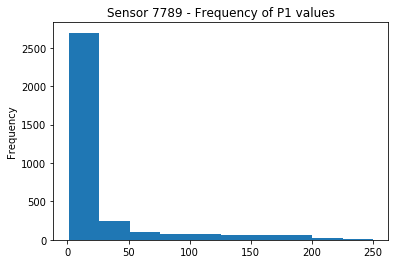

In [64]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
p1_count = sorted_7789['P1'].value_counts(ascending=False)

#p1_count.plot()
p1_count.plot(kind='hist', title = "Sensor 7789 - Frequency of P1 values")

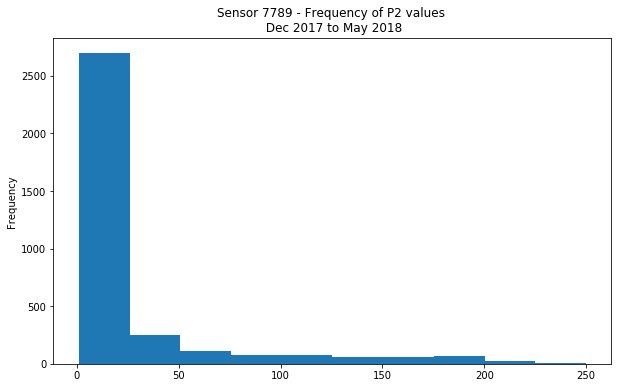

In [89]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
p1_count = sorted_7789['P1'].value_counts(ascending=False)
p1_count
#p1_count.plot()
p1_count.plot(kind='hist', figsize = (10,6), title = "Sensor 7789 - Frequency of P2 values \n Dec 2017 to May 2018")

Text(0,0.5,'Frequency')

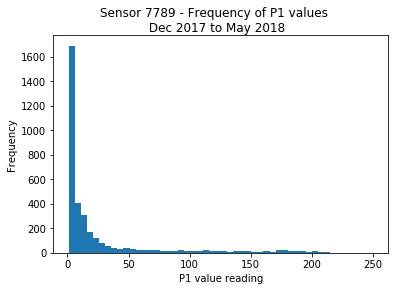

In [95]:
import matplotlib.pyplot as plt
plt.hist(p1_count, bins=50, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical')
plt.suptitle("Sensor 7789 - Frequency of P1 values \n Dec 2017 to May 2018")
plt.xlabel("P1 value reading")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

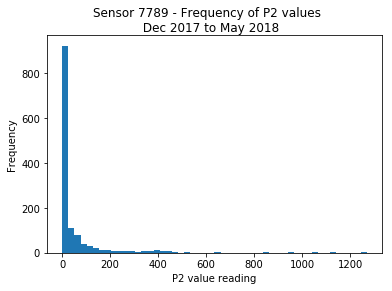

In [94]:
p2_count = sorted_7789['P2'].value_counts(ascending=False)
plt.hist(p2_count, bins=50, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical')
plt.suptitle("Sensor 7789 - Frequency of P2 values \n Dec 2017 to May 2018")
plt.xlabel("P2 value reading")
plt.ylabel("Frequency")